# Supervised ML Model - zillow Dataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb

import sqlite3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

## Explore the data

In [2]:
con = sqlite3.connect("finalprojectdatabase.db")
zlw = pd.read_sql_query("SELECT * from zillow", con)
zlw

,Address,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,latitude,livingArea,longitude,lotSize,date_sold,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,taxAssessedYear,url,yearBuilt
0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,45.543571,1806.0,-122.441765,1555.0,2021-05-21,315400,175.0,1950.0,273960.0,2020-01-01,https://www.zillow.com/homedetails/2860-NE-Blo...,2007-01-01
1,1121 SW 10th Dr,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,45.488228,2724.0,-122.444420,9583.0,2021-06-04,512000,188.0,1995.0,397560.0,2020-01-01,https://www.zillow.com/homedetails/1121-SW-10t...,1982-01-01
2,19309 NE Glisan St,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,45.526634,1217.0,-122.464088,13939.0,2021-06-04,348000,286.0,1695.0,269520.0,2017-01-01,https://www.zillow.com/homedetails/19309-NE-Gl...,1953-01-01
3,1518 SE 12th St,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,45.487991,1150.0,-122.416184,7000.0,2021-06-01,404200,351.0,1800.0,309260.0,2020-01-01,https://www.zillow.com/homedetails/1518-SE-12t...,1967-01-01
4,110 NW Willowbrook Ct,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,45.498184,2036.0,-122.451332,6969.0,2021-05-21,478200,235.0,2250.0,373030.0,2020-01-01,https://www.zillow.com/homedetails/110-NW-Will...,1978-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,7210 SW 156th Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.467113,1752.0,-122.837746,9147.0,2020-07-24,410000,234.0,2462.0,402690.0,2019-01-01,https://www.zillow.com/homedetails/7210-SW-156...,1991-01-01
18261,7050 SW 152nd Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.468781,1924.0,-122.833855,14374.0,2020-07-24,485000,252.0,2562.0,410120.0,2019-01-01,https://www.zillow.com/homedetails/7050-SW-152...,1981-01-01
18262,7600 SW Erica Pl,Beaverton,97008,2.0,3.0,363.0,SINGLE_FAMILY,45.465111,1378.0,-122.808701,10018.0,2020-07-21,415000,301.0,2495.0,386050.0,2019-01-01,https://www.zillow.com/homedetails/7600-SW-Eri...,1977-01-01
18263,7275 SW Palmer Way,Beaverton,97007,3.0,4.0,364.0,SINGLE_FAMILY,45.467197,2176.0,-122.829628,9583.0,2020-07-20,615000,283.0,2495.0,447330.0,2019-01-01,https://www.zillow.com/homedetails/7275-SW-Pal...,1974-01-01


In [3]:
zlw.shape

(18265, 19)

In [4]:
cols = zlw.columns.to_list()
print(cols)

['Address', 'City', 'Zipcode', 'bathrooms', 'bedrooms', 'daysOnZillow', 'homeType', 'latitude', 'livingArea', 'longitude', 'lotSize', 'date_sold', 'price', 'pricePerSquareFoot', 'rentZestimate', 'taxAssessedValue', 'taxAssessedYear', 'url', 'yearBuilt']


In [5]:
# drop columns not needed for machine learning
zlw = zlw.drop(['Address', 'date_sold', 'url', 'rentZestimate', 'latitude', 'longitude'], axis=1)
zlw.head()

,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue,taxAssessedYear,yearBuilt
0,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,1806.0,1555.0,315400,175.0,273960.0,2020-01-01,2007-01-01
1,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,2724.0,9583.0,512000,188.0,397560.0,2020-01-01,1982-01-01
2,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,1217.0,13939.0,348000,286.0,269520.0,2017-01-01,1953-01-01
3,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,1150.0,7000.0,404200,351.0,309260.0,2020-01-01,1967-01-01
4,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,2036.0,6969.0,478200,235.0,373030.0,2020-01-01,1978-01-01


In [6]:
zlw.shape

(18265, 13)

<AxesSubplot:>

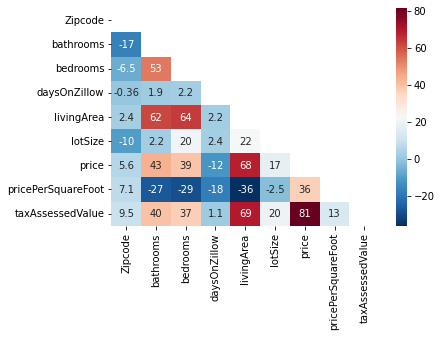

In [7]:
# correlation heatmap
mask = np.zeros_like(zlw.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median house price is $517,000.00.


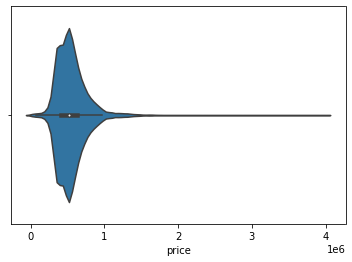

In [8]:
# view distribution of the target variable (price)
sb.violinplot(data=zlw, x='price')
print(f"The median house price is ${(zlw.price.median()):,.2f}.")

In [9]:
zlw.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,1.826500e+04,18265.000000,1.826500e+04
mean,97148.242431,2.460827,3.368191,187.579250,2078.627922,6852.924884,5.496832e+05,275.870298,4.636757e+05
std,86.271481,0.814036,0.769367,112.751753,765.683850,3171.615991,2.242703e+05,85.691069,1.899900e+05
min,97003.000000,1.000000,2.000000,1.000000,528.000000,421.000000,3.000000e+02,0.000000,9.500000e+02
25%,97062.000000,2.000000,3.000000,82.000000,1498.000000,4791.000000,4.100000e+05,225.000000,3.449300e+05
50%,97203.000000,3.000000,3.000000,192.000000,1978.000000,6534.000000,5.170000e+05,264.000000,4.260800e+05
75%,97221.000000,3.000000,4.000000,293.000000,2561.000000,8712.000000,6.335000e+05,313.000000,5.393100e+05
max,97267.000000,4.500000,5.000000,364.000000,4540.000000,17800.000000,4.000000e+06,2019.000000,4.008660e+06


In [10]:
zlw.dtypes

City                   object
Zipcode                 int64
bathrooms             float64
bedrooms              float64
daysOnZillow          float64
homeType               object
livingArea            float64
lotSize               float64
price                   int64
pricePerSquareFoot    float64
taxAssessedValue      float64
taxAssessedYear        object
yearBuilt              object
dtype: object

In [11]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [12]:
# assign dummy values to object columns
# by hot encode categorical data
zlw_dum = pd.get_dummies(zlw, columns = ['City', 'homeType', 'taxAssessedYear', 'yearBuilt'])
zlw_dum.head()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue,City_Aloha,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,97024,3.0,3.0,25.0,1806.0,1555.0,315400,175.0,273960.0,0,...,0,0,0,0,0,0,0,0,0,0
1,97080,3.0,4.0,11.0,2724.0,9583.0,512000,188.0,397560.0,0,...,0,0,0,0,0,0,0,0,0,0
2,97230,1.0,3.0,11.0,1217.0,13939.0,348000,286.0,269520.0,0,...,0,0,0,0,0,0,0,0,0,0
3,97080,2.0,3.0,14.0,1150.0,7000.0,404200,351.0,309260.0,0,...,0,0,0,0,0,0,0,0,0,0
4,97030,2.0,3.0,25.0,2036.0,6969.0,478200,235.0,373030.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
zlw_dum.dtypes

Zipcode                   int64
bathrooms               float64
bedrooms                float64
daysOnZillow            float64
livingArea              float64
                         ...   
yearBuilt_2017-01-01      uint8
yearBuilt_2018-01-01      uint8
yearBuilt_2019-01-01      uint8
yearBuilt_2020-01-01      uint8
yearBuilt_2021-01-01      uint8
Length: 185, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [14]:
# set features list for assigning df after scaler
zlw_scaled_std = zlw_dum.copy()
zlw_scaled_std = zlw_scaled_std.drop('price', axis=1)
col_names_std = zlw_scaled_std.columns
features_std = zlw_scaled_std[col_names_std]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [16]:
# set variables
y_std = zlw_dum.price
X_std = zlw_scaled_std

In [17]:
# fit and transform the X data; leave y data so we can interpret predicted price
zlw_scaled_std[col_names_std] = scaler_std.fit_transform(features_std.values)
zlw_scaled_std

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,-1.440173,0.662364,-0.478576,-1.441962,-0.356068,-1.670464,-1.177171,-0.998584,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
1,-0.791041,0.662364,0.821230,-1.566132,0.842893,0.860807,-1.025459,-0.348005,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
2,0.947704,-1.794597,-0.478576,-1.566132,-1.125336,2.234277,0.118215,-1.021954,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
3,-0.791041,-0.566117,-0.478576,-1.539524,-1.212842,0.046374,0.876775,-0.812779,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
4,-1.370623,-0.566117,-0.478576,-1.441962,-0.055675,0.036599,-0.476962,-0.477121,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,-1.637230,-0.566117,-0.478576,1.529249,-0.426595,0.723334,-0.488633,-0.321003,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18261,-1.637230,-0.566117,-0.478576,1.529249,-0.201953,2.371435,-0.278570,-0.281895,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18262,-1.625639,-0.566117,-0.478576,1.555857,-0.915061,0.997965,0.293267,-0.408589,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18263,-1.637230,0.662364,0.821230,1.564726,0.127174,0.860807,0.083205,-0.086037,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878


In [18]:
# check mean (~0) and standard deviation (~1) of the scaled data
zlw_scaled_std.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,...,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04
mean,-5.393046e-15,4.665076e-15,-4.358481e-15,1.470977e-17,-3.915352e-16,3.598034e-15,8.719490e-17,2.400823e-16,3.368087e-14,7.473521e-14,...,4.397985e-15,1.523914e-15,-2.047070e-15,-2.495019e-15,-1.185823e-16,2.115303e-15,-2.471419e-15,-3.710108e-15,-3.706337e-15,2.321579e-15
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.683597e+00,-1.794597e+00,-1.778382e+00,-1.654824e+00,-2.025210e+00,-2.028020e+00,-3.219447e+00,-2.435593e+00,-1.339616e-01,-3.253158e-01,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
25%,-9.996906e-01,-5.661167e-01,-4.785763e-01,-9.364124e-01,-7.583336e-01,-6.501359e-01,-5.936639e-01,-6.250274e-01,-1.339616e-01,-3.253158e-01,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
50%,6.347297e-01,6.623639e-01,-4.785763e-01,3.920889e-02,-1.314259e-01,-1.005587e-01,-1.385281e-01,-1.978880e-01,-1.339616e-01,-3.253158e-01,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
75%,8.433791e-01,6.623639e-01,8.212297e-01,9.350066e-01,6.300058e-01,5.861763e-01,4.333091e-01,3.981071e-01,-1.339616e-01,-3.253158e-01,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
max,1.376594e+00,2.505085e+00,2.121036e+00,1.564726e+00,3.214694e+00,3.451671e+00,2.034258e+01,1.865931e+01,7.464824e+00,3.073936e+00,...,1.031703e+01,1.031703e+01,1.095264e+01,9.227982e+00,8.855114e+00,9.576833e+00,1.091625e+01,1.245436e+01,7.271799e+00,1.453904e+01


In [19]:
zlw_scaled_std.shape

(18265, 184)

In [20]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.2, random_state=573)
print(X_std_train.shape)

(14612, 184)


In [21]:
from sklearn.linear_model import LinearRegression
model_std = LinearRegression()

In [22]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std.fit(X_std, y_std)
training_score_std = model_std.score(X_std_train, y_std_train)
testing_score_std = model_std.score(X_std_test, y_std_test)

print(f"Training Score: {training_score_std}")
print(f"Testing Score: {testing_score_std}")

Training Score: 0.9231888327600662
Testing Score: 0.9160171560183042


In [23]:
y_pred_std = model_std.predict(X_std_test)

In [24]:
# compare actual vs predicted
regr_df_std = pd.DataFrame({'Actual':y_std_test, 'Predicted':y_pred_std, 'ABS Difference': abs(y_std_test-y_pred_std)})

In [25]:
regr_df_std.describe()

,Actual,Predicted,ABS Difference
count,3.653000e+03,3.653000e+03,3.653000e+03
mean,5.505448e+05,5.518312e+05,3.835669e+04
std,2.322957e+05,2.204848e+05,5.531892e+04
min,3.000000e+02,-1.663791e+05,4.917127e+00
25%,4.084320e+05,4.129329e+05,1.121292e+04
50%,5.160000e+05,5.194769e+05,2.407692e+04
75%,6.340000e+05,6.459729e+05,4.645292e+04
max,4.000000e+06,2.875797e+06,1.124203e+06


#### MinMaxScaler

In [26]:
# set features list for assigning df after scaler
zlw_scaled_mm = zlw_dum.copy()
zlw_scaled_mm = zlw_scaled_mm.drop('price', axis=1)
col_names_mm = zlw_scaled_mm.columns
features_mm = zlw_scaled_mm[col_names_mm]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()

In [28]:
# set variables
y_mm = zlw_dum.price
X_mm = zlw_scaled_mm

In [29]:
# fit and transform the data
zlw_scaled_mm[col_names_mm] = scaler_mm.fit_transform(features_mm.values)
zlw_scaled_mm

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,0.079545,0.571429,0.333333,0.066116,0.318544,0.065251,0.086677,0.068121,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.291667,0.571429,0.666667,0.027548,0.547358,0.527188,0.093115,0.098962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.859848,0.000000,0.333333,0.027548,0.171735,0.777835,0.141654,0.067013,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.291667,0.285714,0.333333,0.035813,0.155035,0.378560,0.173848,0.076929,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.102273,0.285714,0.333333,0.066116,0.375872,0.376777,0.116394,0.092841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,0.015152,0.285714,0.333333,0.988981,0.305085,0.502100,0.115899,0.100242,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18261,0.015152,0.285714,0.333333,0.988981,0.347956,0.802866,0.124814,0.102096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18262,0.018939,0.285714,0.333333,0.997245,0.211864,0.552218,0.149084,0.096090,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18263,0.015152,0.571429,0.666667,1.000000,0.410768,0.527188,0.140168,0.111380,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
zlw_scaled_mm.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,...,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,0.550161,0.417379,0.456064,0.513992,0.386497,0.370098,0.136637,0.115459,0.017629,0.095702,...,0.009307,0.009307,0.008267,0.011607,0.012592,0.010786,0.008322,0.006406,0.018560,0.004708
std,0.326786,0.232582,0.256456,0.310611,0.190848,0.182497,0.042442,0.047406,0.131604,0.294190,...,0.096028,0.096028,0.090550,0.107111,0.111510,0.103295,0.090847,0.079781,0.134969,0.068458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223485,0.285714,0.333333,0.223140,0.241775,0.251453,0.111441,0.085830,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.757576,0.571429,0.333333,0.526171,0.361416,0.351746,0.130758,0.106078,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.825758,0.571429,0.666667,0.804408,0.506730,0.477070,0.155027,0.134331,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
zlw_scaled_mm.shape

(18265, 184)

In [32]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y_mm, test_size=0.2, random_state=573)
print(X_mm_train.shape)

(14612, 184)


In [33]:
from sklearn.linear_model import LinearRegression
model_mm = LinearRegression()

In [34]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm.fit(X_mm, y_mm)
training_score_mm = model_mm.score(X_mm_train, y_mm_train)
testing_score_mm = model_mm.score(X_mm_test, y_mm_test)

print(f"Training Score: {training_score_mm}")
print(f"Testing Score: {testing_score_mm}")

Training Score: 0.9234706686532608
Testing Score: 0.9161581314605561


In [35]:
y_pred_mm = model_mm.predict(X_mm_test)

In [36]:
# compare actual vs predicted
regr_df_mm = pd.DataFrame({'Actual':y_mm_test, 'Predicted':y_pred_mm, 'ABS Difference': abs(y_mm_test-y_pred_mm)})
regr_df_mm

,Actual,Predicted,ABS Difference
12545,390000,366356.0,23644.0
516,640000,626064.0,13936.0
13431,570000,530984.0,39016.0
13730,325000,337552.0,12552.0
10990,730000,831612.0,101612.0
...,...,...,...
2600,330000,296628.0,33372.0
12858,465000,580856.0,115856.0
15432,497000,500312.0,3312.0
5729,319000,276828.0,42172.0


In [37]:
regr_df_mm.describe()

,Actual,Predicted,ABS Difference
count,3.653000e+03,3.653000e+03,3.653000e+03
mean,5.505448e+05,5.516934e+05,3.828069e+04
std,2.322957e+05,2.204016e+05,5.530282e+04
min,3.000000e+02,-1.677400e+05,1.600000e+01
25%,4.084320e+05,4.123320e+05,1.128800e+04
50%,5.160000e+05,5.193800e+05,2.427600e+04
75%,6.340000e+05,6.447800e+05,4.615600e+04
max,4.000000e+06,2.875396e+06,1.124604e+06


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [38]:
from sklearn import metrics

MAE_std = metrics.mean_absolute_error(y_std_test, y_pred_std)
MSE_std = metrics.mean_squared_error(y_std_test,y_pred_std)
RMSE_std = np.sqrt(MSE_std)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 38356.68748464817.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4530581211.865973.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 67309.5922723201.


In [39]:
R2_std = model_std.score(X_std,y_std)
print(f'R2 score is {R2_std}')

R2 score is 0.9216506274524388


In [40]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std = 1-(((1-R2_std)*(len(y_std)-1))/(len(y_std)-X_std.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std}')
print(f'There are {len(y_std)} in the observation and {X_std.shape[1]} predictor variables.')

Adjusted R2 score is 0.9208532665813796
There are 18265 in the observation and 184 predictor variables.


#### MinMaxScaler

In [41]:
from sklearn import metrics

MAE_mm = metrics.mean_absolute_error(y_mm_test, y_pred_mm)
MSE_mm = metrics.mean_squared_error(y_mm_test,y_pred_mm)
RMSE_mm = np.sqrt(MSE_mm)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 38280.690938954285.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4522976078.963592.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 67253.07486623635.


In [42]:
R2_mm = model_mm.score(X_mm,y_mm)
print(f'R2 score is {R2_mm}')

R2 score is 0.9219022445160039


In [43]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm = 1-(((1-R2_mm)*(len(y_mm)-1))/(len(y_mm)-X_mm.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm}')
print(f'There are {len(y_mm)} in the observation and {X_mm.shape[1]} predictor variables.')

Adjusted R2 score is 0.9211074443495738
There are 18265 in the observation and 184 predictor variables.


### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. However, the MinMaxScaler has a slightly lower RMSE and a slightly higher adjusted R2, so the MinMaxScaler is the recommended scaler for the dataset.

The RMSE of the MinMaxScaler indicates that on average, there is about a (USD)67k difference in actual price vs predicted price. The adjusted r-squared value of 0.9211 indicates that the model is a good fit.

## Future Steps

Fom the machine learning model, we have learned that we can relatively accurately predict the price of a house based on certain features. 

The next step is to automate feature selection (this version uses manual selection - ex. we knew we did not need URL to feed into the model) using scikit-learn and other methods (ex. decision trees & PCA).

Additionally, a next step for the model would be to integrate the model on the website we have created and have the model predict the price of a house based on features selected by the user. 